<a href="https://colab.research.google.com/github/mbagci06/lung_covid/blob/main/test_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# BASICS 
import os
import numpy as np
import torch

# MODEL and TRAIN
import torchvision
import torchvision.models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import random
from skimage import io
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
from torch import optim
from PIL import Image

In [ ]:
! git clone https://github.com/mbagci06/lung_covid
! pip install kaggle
! mkdir ~/.kaggle
! cp lung_covid/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d anasmohammedtahir/covidqu

Cloning into 'lung_covid'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 229 (delta 71), reused 119 (delta 65), pack-reused 100
Receiving objects: 100% (229/229), 1.24 MiB | 23.45 MiB/s, done.
Resolving deltas: 100% (119/119), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 1.15G/1.15G [00:10<00:00, 125MB/s]
100% 1.15G/1.15G [00:10<00:00, 114MB/s]


In [ ]:
!unzip "/content/covidqu.zip" -d "/content/archive/" &> /dev/null

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1MIzhxSou4TRtQTcG3AADqLag28nj3FrV?usp=sharing

Retrieving folder list
Retrieving folder 1-0l5hmY5hmdamdO5ZZUBzojpporaBi-h .ipynb_checkpoints
Processing file 1qkvy4UI9Cw766oLUPZvkZ4eA2OipsT6- deeplab_covid_30_epo.pth
Processing file 1uEImWp2mLOjMV-7Ge3_WaTVRcmDmnSco deeplab_covid_30_epo.txt
Processing file 1TnQLuc4N8kEssqn9Wmb7hGKaaHC1FJ9H deeplab_fransfer_lung_50_epo.pth
Processing file 1tcMX2dtdHO17cdE09bmRZDTg0zovvtUH deeplab_lung_30_epo.pth
Processing file 1RM9kH2BAG7yq-L2larWPS23levRhgMRz deeplab_lung_30_epo.txt
Processing file 1-1O520KqAGWnAQL8DHT0SjS6MXcV7Rbs deeplab_transfer_covid_60_epo.pth
Processing file 1-6_dEdEihVa2gPVyfode50OoTVUzZ1vy deeplab_transfer_covid_60_epo.txt
Processing file 1RG-Unwxf0hLD-cwVT6reGK47RvzLCCeZ deeplab_transfer_lung_50_epo.txt
Processing file 1NdJZO_B3uoQ7pmEVS3ClGv0dL3FoTlS3 UNet_covid_50_epo.txt
Processing file 1XBugwkZDCu85Nkd6P85_1Wtca98W7-hk UNet_covid_50_epoch.pt
Processing file 1-0KJb_gFSzbJ6wHcVS7VUKTZaoZOmPDK UNet_model_lung_pre_20_epo.txt
Processing file 1jV0bCKORrmsP5XFM5cHXJ_8pQMAFdhH

In [ ]:
%run lung_covid/functions.ipynb
%run lung_covid/DeepLab.ipynb
%run lung_covid/unet.ipynb

In [ ]:
# The device looks for GPU if cannot find goes with CPU
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
test_lung=Lung_Dataset_RGB(split = "Test",class_folder='lung')
tra_lung_size=test_lung.__len__()
print("Number of the Lung test images are ",tra_lung_size)

test_covid=Lung_Dataset_RGB(split = "Test",class_folder='covid')
tra_covid_size=test_covid.__len__()
print("Number of the Covid test images are ",tra_covid_size)

test_covid_nn=Lung_Dataset_RGB(split = "Test",class_folder='covid',norm=False)
tra_covid_size_nn=test_covid.__len__()
print("Number of the Covid test images are ",tra_covid_size_nn)

Number of the Lung test images are  6788
Number of the Covid test images are  1166
Number of the Covid test images are  1166


In [ ]:
batch_size=12
# loading images and masks for mini batches
test_lung_loader = torch.utils.data.DataLoader(        test_lung, batch_size=batch_size,  num_workers=2, drop_last=True)

test_covid_loader = torch.utils.data.DataLoader(        test_covid, batch_size=batch_size,  num_workers=2, drop_last=True)

test_covid_loader_nn = torch.utils.data.DataLoader(        test_covid_nn, batch_size=batch_size,  num_workers=2, drop_last=True)


- deeplab_covid_30_epo.pth
- deeplab_fransfer_lung_50_epo.pth
- deeplab_lung_30_epo.pth
- deeplab_transfer_covid_60_epo.pth
- UNet_covid_50_epoch.pt
- UNet_model_lung_pre_20_epoch.pt
- UNet_model_lung_pre_30_epoch.pt
- UNet_NONORM_covid_30_epoch.pt
- UNet_transfer_covid_90_epoch.pt
- UNet_transfer_lung_50_epoch.pt

In [ ]:
# Pretraned model Lung U-Net 
net_l = Unet_Res().to(device)
checkpoint = torch.load('ECE228_models_texts/UNet_model_lung_pre_30_epoch.pt',map_location=torch.device(device=device))
net_l.load_state_dict(checkpoint['model_state_dict'])
net_l.eval()

# transfer model  lung U-Net 
net_tl = Unet_Res().to(device)
checkpoint = torch.load('ECE228_models_texts/UNet_transfer_lung_50_epoch.pt',map_location=torch.device(device=device))
net_tl.load_state_dict(checkpoint['model_state_dict'])
net_tl.eval()


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

Unet_Res(
  (encoder): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
         

In [ ]:
# Pretraned model covid U-Net 
net_c = Unet_Res().to(device)
checkpoint = torch.load('ECE228_models_texts/UNet_covid_50_epoch.pt')
net_c.load_state_dict(checkpoint['model_state_dict'])
net_c.eval()

# Transfer model covid U-Net 
net_tc = Unet_Res().to(device)
checkpoint = torch.load('ECE228_models_texts/UNet_transfer_covid_90_epoch.pt')
net_tc.load_state_dict(checkpoint['model_state_dict'])
net_tc.eval()

Unet_Res(
  (encoder): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
         

In [ ]:
# # Pretraned model covid U-Net nn
# net_c_nn = Unet_Res().to(device)
# checkpoint = torch.load('ECE228_models_texts/UNet_NONORM_covid_30_epoch.pt')
# net_c_nn.load_state_dict(checkpoint['model_state_dict'])
# net_c_nn.eval()

# # Trabsfer learning Covid U-Net 
# net_tc = Unet_Res().to(device)
# checkpoint = torch.load('ECE228_models_texts/UNet_transfer_covid_90_epoch.pt',map_location=torch.device(device=device))
# net_tc.load_state_dict(checkpoint['model_state_dict'])
# net_tc.eval()

In [ ]:
# Pretraned model Lung Deeplab
deep_l = DeepLabv3_plus(nInputChannels=3, n_classes=2, os=8, pretrained=True).to(device=device)
checkpoint = torch.load('ECE228_models_texts/deeplab_lung_30_epo.pth',map_location=torch.device(device=device))
deep_l.load_state_dict(checkpoint['model_state_dict'])
deep_l.eval()
# Trabsfer learning Lung Deeplab 
deep_tl = DeepLabv3_plus(nInputChannels=3, n_classes=2, os=8, pretrained=True).to(device=device)
checkpoint = torch.load('ECE228_models_texts/deeplab_fransfer_lung_50_epo.pth')
deep_tl.load_state_dict(checkpoint['model_state_dict'])
deep_tl.eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

DeepLabv3_plus(
  (resnet_features): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequent

In [ ]:
# Pretraned model covid Deeplab
deep_c = DeepLabv3_plus(nInputChannels=3, n_classes=2, os=8, pretrained=True).to(device=device)
checkpoint = torch.load('ECE228_models_texts/deeplab_covid_30_epo.pth',map_location=torch.device(device=device))
deep_c.load_state_dict(checkpoint['model_state_dict'])
deep_c.eval()
# Trabsfer learning Lung deeplab 
deep_tc = DeepLabv3_plus(nInputChannels=3, n_classes=2, os=8, pretrained=True).to(device=device)
checkpoint = torch.load('ECE228_models_texts/deeplab_transfer_covid_60_epo.pth')
deep_tc.load_state_dict(checkpoint['model_state_dict'])
deep_tc.eval()

DeepLabv3_plus(
  (resnet_features): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequent

In [ ]:
!nvidia-smi

Fri Jun 10 01:21:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    34W / 250W |   3861MiB / 16280MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
acc_bin=0
acc_dice=0
acc_iou=0
for batch_idx, sample in enumerate(test_covid_loader):
    # Validation data preparing  and calling 

    # Call iamge and mask
    imgs , true_masks = sample['image'],sample['mask']

    imgs = imgs.to(device=device)
    true_masks=Negative_mask(true_masks,imgs.size(dim=0))
    true_masks = true_masks.to(device=device)
    # zero the parameter gradients

    with torch.set_grad_enabled(False):
        # Validation evaluation 
        masks_pred = net_c(imgs)

        acc_dice += dice( masks_pred, true_masks)
        acc_bin +=binary_acc( masks_pred, true_masks).item()
        acc_iou += iou( masks_pred, true_masks)

print("Accuracy results for UNet covid  ")
print('covid Acc Bin:',(acc_bin)/(tra_covid_size/batch_size))
print('covid Acc Dice :',(acc_dice)/(tra_covid_size/batch_size))
print('covid Acc iou :',(acc_iou)/(tra_covid_size/batch_size))

Accuracy results for UNet covid  
covid Acc Bin: 0.9771381859918401
covid Acc Dice : 0.9770112986425592
covid Acc iou : tensor(0.9575, device='cuda:0')


In [ ]:
acc_bin=0
acc_dice=0
acc_iou=0
for batch_idx, sample in enumerate(test_covid_loader):
    # Validation data preparing  and calling 

    # Call iamge and mask
    imgs , true_masks = sample['image'],sample['mask']

    imgs = imgs.to(device=device)
    true_masks=Negative_mask(true_masks,imgs.size(dim=0))
    true_masks = true_masks.to(device=device)
    # zero the parameter gradients

    with torch.set_grad_enabled(False):
        # Validation evaluation 
        masks_pred = net_tc(imgs)

        acc_dice += dice( masks_pred, true_masks)
        acc_bin +=binary_acc( masks_pred, true_masks).item()
        acc_iou += iou( masks_pred, true_masks)


print("Accuracy results for UNet transfer covid  ")
print('covid Acc Bin:',(acc_bin)/(tra_covid_size/batch_size))
print('covid Acc Dice :',(acc_dice)/(tra_covid_size/batch_size))
print('covid Acc iou :',(acc_iou)/(tra_covid_size/batch_size))

Accuracy results for UNet transfer covid  
covid Acc Bin: 0.97337298716321
covid Acc Dice : 0.9732553288212771
covid Acc iou : tensor(0.9506, device='cuda:0')


In [ ]:
acc_bin=0
acc_dice=0
acc_iou=0
for batch_idx, sample in enumerate(test_lung_loader):
    # Validation data preparing  and calling 

    # Call iamge and mask
    imgs , true_masks = sample['image'],sample['mask']

    imgs = imgs.to(device=device)
    true_masks=Negative_mask(true_masks,imgs.size(dim=0))
    true_masks = true_masks.to(device=device)
    # zero the parameter gradients

    with torch.set_grad_enabled(False):
        # Validation evaluation 
        masks_pred = net_l(imgs)

        acc_dice += dice( masks_pred, true_masks)
        acc_bin +=binary_acc( masks_pred, true_masks).item()
        acc_iou += iou( masks_pred, true_masks)

print("Accuracy results for UNet  lung  ")
print('Lung Acc Bin:',(acc_bin)/(tra_lung_size/batch_size))
print('Lung Acc Dice :',(acc_dice)/(tra_lung_size/batch_size))
print('Lung Acc iou :',(acc_iou)/(tra_lung_size/batch_size))

Accuracy results for UNet  lung  
Lung Acc Bin: 0.9854983513890538
Lung Acc Dice : 0.9854449888644109
Lung Acc iou : tensor(0.9725, device='cuda:0')


In [ ]:
acc_bin=0
acc_dice=0
acc_iou=0
for batch_idx, sample in enumerate(test_lung_loader):
    # Validation data preparing  and calling 

    # Call iamge and mask
    imgs , true_masks = sample['image'],sample['mask']

    imgs = imgs.to(device=device)
    true_masks=Negative_mask(true_masks,imgs.size(dim=0))
    true_masks = true_masks.to(device=device)
    # zero the parameter gradients

    with torch.set_grad_enabled(False):
        # Validation evaluation 
        masks_pred = net_tl(imgs)

        acc_dice += dice( masks_pred, true_masks)
        acc_bin +=binary_acc( masks_pred, true_masks).item()
        acc_iou += iou( masks_pred, true_masks)


print("Accuracy results for UNet transfer  lung  ")
print('Lung Acc Bin:',(acc_bin)/(tra_lung_size/batch_size))
print('Lung Acc Dice :',(acc_dice)/(tra_lung_size/batch_size))
print('Lung Acc iou :',(acc_iou)/(tra_lung_size/batch_size))

Accuracy results for UNet transfer  lung  
Lung Acc Bin: 0.9836476678418355
Lung Acc Dice : 0.9835897446662171
Lung Acc iou : tensor(0.9689, device='cuda:0')


In [ ]:
# acc_bin=0
# acc_dice=0
# acc_iou=0
# for batch_idx, sample in enumerate(test_covid_loader_nn):
#     # Validation data preparing  and calling 

#     # Call iamge and mask
#     imgs , true_masks = sample['image'],sample['mask']

#     imgs = imgs.to(device=device)
#     true_masks=Negative_mask(true_masks,imgs.size(dim=0))
#     true_masks = true_masks.to(device=device)
#     # zero the parameter gradients

#     with torch.set_grad_enabled(False):
#         # Validation evaluation 
#         masks_pred = net_c_nn(imgs)

#         acc_dice += dice( masks_pred, true_masks)
#         acc_bin +=binary_acc( masks_pred, true_masks).item()
#         acc_iou += iou( masks_pred, true_masks)


# print("Accuracy results for U-Net covid NN ")
# print('Lung Acc Bin:',(acc_bin)/(tra_covid_size/batch_size))
# print('Lung Acc Dice :',(acc_dice)/(tra_covid_size/batch_size))
# print('Lung Acc iou :',(acc_iou)/(tra_covid_size/batch_size))

In [ ]:
acc_bin=0
acc_dice=0
acc_iou=0
for batch_idx, sample in enumerate(test_lung_loader):
    # Validation data preparing  and calling 

    # Call iamge and mask
    imgs , true_masks = sample['image'],sample['mask']

    imgs = imgs.to(device=device)
    true_masks=Negative_mask(true_masks,imgs.size(dim=0))
    true_masks = true_masks.to(device=device)
    # zero the parameter gradients

    with torch.set_grad_enabled(False):
        # Validation evaluation 
        masks_pred = deep_l(imgs)

        acc_dice += dice( masks_pred, true_masks)
        acc_bin +=binary_acc( masks_pred, true_masks).item()
        acc_iou += iou( masks_pred, true_masks)


print("Accuracy results for Deeplab  Lung  ")
print('Lung Acc Bin:',(acc_bin)/(tra_lung_size/batch_size))
print('Lung Acc Dice :',(acc_dice)/(tra_lung_size/batch_size))
print('Lung Acc iou :',(acc_iou)/(tra_lung_size/batch_size))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Accuracy results for Deeplab  Lung  
Lung Acc Bin: 0.9851737144278582
Lung Acc Dice : 0.9851322176882149
Lung Acc iou : tensor(0.9719, device='cuda:0')


In [ ]:
acc_bin=0
acc_dice=0
acc_iou=0
for batch_idx, sample in enumerate(test_lung_loader):
    # Validation data preparing  and calling 

    # Call iamge and mask
    imgs , true_masks = sample['image'],sample['mask']

    imgs = imgs.to(device=device)
    true_masks=Negative_mask(true_masks,imgs.size(dim=0))
    true_masks = true_masks.to(device=device)
    # zero the parameter gradients

    with torch.set_grad_enabled(False):
        # Validation evaluation 
        masks_pred = deep_tl(imgs)

        acc_dice += dice( masks_pred, true_masks)
        acc_bin +=binary_acc( masks_pred, true_masks).item()
        acc_iou += iou( masks_pred, true_masks)


print("Accuracy results for Deeplab v3+ transfer Lung  ")
print('Lung Acc Bin:',(acc_bin)/(tra_lung_size/batch_size))
print('Lung Acc Dice :',(acc_dice)/(tra_lung_size/batch_size))
print('Lung Acc iou :',(acc_iou)/(tra_lung_size/batch_size))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Accuracy results for Deeplab v3+ transfer Lung  
Lung Acc Bin: 0.9790763562050159
Lung Acc Dice : 0.9789648759905984
Lung Acc iou : tensor(0.9600, device='cuda:0')


In [ ]:
acc_bin=0
acc_dice=0
acc_iou=0
for batch_idx, sample in enumerate(test_covid_loader):
    # Validation data preparing  and calling 

    # Call iamge and mask
    imgs , true_masks = sample['image'],sample['mask']

    imgs = imgs.to(device=device)
    true_masks=Negative_mask(true_masks,imgs.size(dim=0))
    true_masks = true_masks.to(device=device)
    # zero the parameter gradients

    with torch.set_grad_enabled(False):
        # Validation evaluation 
        masks_pred = deep_c(imgs)

        acc_dice += dice( masks_pred, true_masks)
        acc_bin +=binary_acc( masks_pred, true_masks).item()
        acc_iou += iou( masks_pred, true_masks)

print("Accuracy results for deeplab    Covid  ")
print('covid  Acc Bin:',(acc_bin)/(tra_covid_size/batch_size))
print('covid  Dice :',(acc_dice)/(tra_covid_size/batch_size))
print('covid  iou :',(acc_iou)/(tra_covid_size/batch_size))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Accuracy results for deeplab    Covid  
covid  Acc Bin: 0.9782249796656352
covid  Dice : 0.9780792907826078
covid  iou : tensor(0.9595, device='cuda:0')


In [ ]:
acc_bin=0
acc_dice=0
acc_iou=0
for batch_idx, sample in enumerate(test_covid_loader):
    # Validation data preparing  and calling 

    # Call iamge and mask
    imgs , true_masks = sample['image'],sample['mask']

    imgs = imgs.to(device=device)
    true_masks=Negative_mask(true_masks,imgs.size(dim=0))
    true_masks = true_masks.to(device=device)
    # zero the parameter gradients

    with torch.set_grad_enabled(False):
        # Validation evaluation 
        masks_pred = deep_tc(imgs)

        acc_dice += dice( masks_pred, true_masks)
        acc_bin +=binary_acc( masks_pred, true_masks).item()
        acc_iou += iou( masks_pred, true_masks)

print("Accuracy results for deeplab Transfer Learning Covid  ")
print('covid transfer Acc Bin:',(acc_bin)/(tra_covid_size/batch_size))
print('covid transfer Dice :',(acc_dice)/(tra_covid_size/batch_size))
print('covid transfer iou :',(acc_iou)/(tra_covid_size/batch_size))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Accuracy results for deeplab Transfer Learning Covid  
covid transfer Acc Bin: 0.9705345818763327
covid transfer Dice : 0.9702712696167044
covid transfer iou : tensor(0.9452, device='cuda:0')


In [ ]:
acc_bin=0
acc_dice=0
acc_iou=0
for batch_idx, sample in enumerate(test_covid_loader):
    # Validation data preparing  and calling 

    # Call iamge and mask
    imgs , true_masks = sample['image'],sample['mask']

    imgs = imgs.to(device=device)
    true_masks=Negative_mask(true_masks,imgs.size(dim=0))
    true_masks = true_masks.to(device=device)
    # zero the parameter gradients

    with torch.set_grad_enabled(False):
        # Validation evaluation 
        
        lung_mask= net_l(imgs)[:,0,:,:]
        masks_pred = deep_c(imgs)[:,0,:,:]
        mask=torch.where(lung_mask>=0.5, 1, 0)
        masks_pred=masks_pred*mask
        acc_bin +=binary_acc( masks_pred, true_masks[:,0,:,:]).item()

print("Accuracy results for deeplab Transfer Learning Covid  ")
print('covid transfer Acc Bin:',(acc_bin)/(tra_covid_size/batch_size))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Accuracy results for deeplab Transfer Learning Covid  
covid transfer Acc Bin: 0.9782616276274823


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


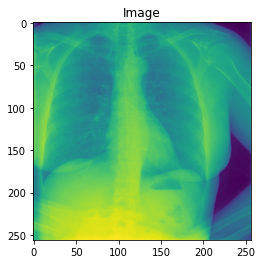

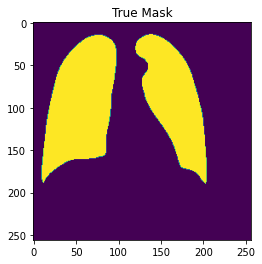

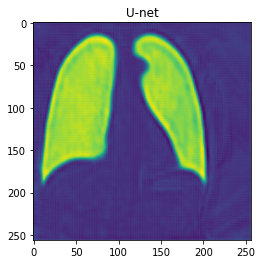

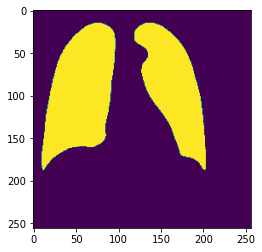

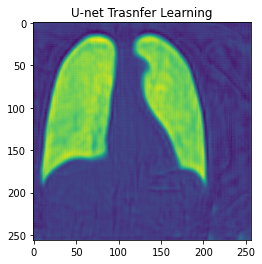

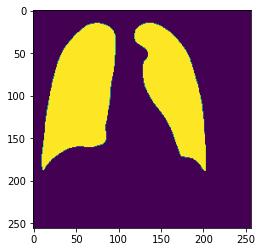

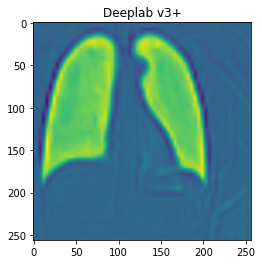

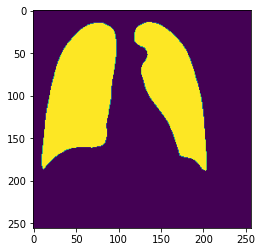

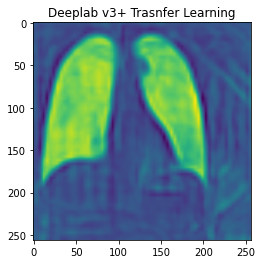

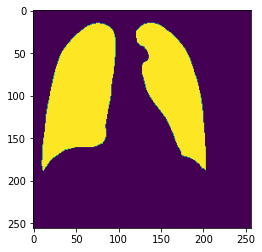

In [ ]:
########################### LUNG PLOTS 
lung_img=test_lung.__getitem__(10)['image']
lung_mask=test_lung.__getitem__(10)['mask']

plt.figure()
plt.title("Image")

plt.imshow(lung_img[0,:,:])
plt.figure()
plt.title("True Mask")

plt.imshow(lung_mask[0,:,:])

tra=net_l(lung_img.reshape(1,3,256,256).to(device=device))
plt.figure()
plt.title("U-net")

plt.imshow(tra[0,0,:,:].detach().cpu())
plt.figure()
tra=torch.where(tra>=0.5, 1, 0)
plt.imshow(tra[0,0,:,:].detach().cpu())

tra=net_tl(lung_img.reshape(1,3,256,256).to(device=device))
plt.figure()
plt.title("U-net Trasnfer Learning")

plt.imshow(tra[0,0,:,:].detach().cpu())
plt.figure()
tra=torch.where(tra>=0.5, 1, 0)
plt.imshow(tra[0,0,:,:].detach().cpu())


tra=deep_l(lung_img.reshape(1,3,256,256).to(device=device))
plt.figure()
plt.title("Deeplab v3+")

plt.imshow(tra[0,0,:,:].detach().cpu())
plt.figure()
tra=torch.where(tra>=0.5, 1, 0)
plt.imshow(tra[0,0,:,:].detach().cpu())

tra=deep_tl(lung_img.reshape(1,3,256,256).to(device=device))
plt.figure()
plt.title("Deeplab v3+ Trasnfer Learning")

plt.imshow(tra[0,0,:,:].detach().cpu())
plt.figure()
tra=torch.where(tra>=0.5, 1, 0)
plt.imshow(tra[0,0,:,:].detach().cpu())


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


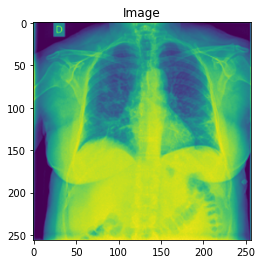

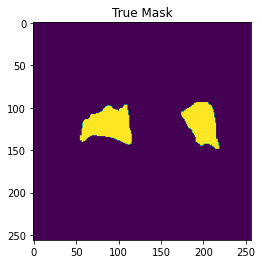

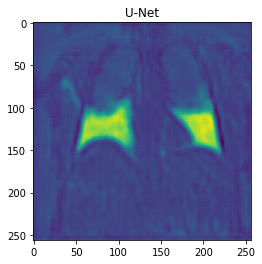

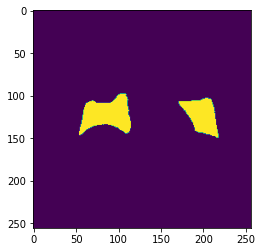

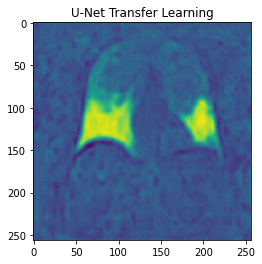

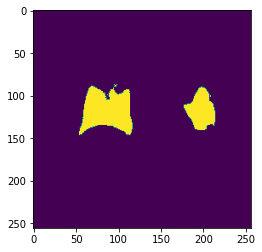

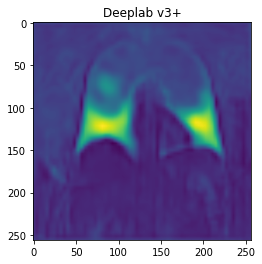

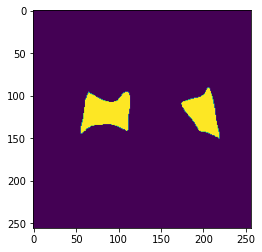

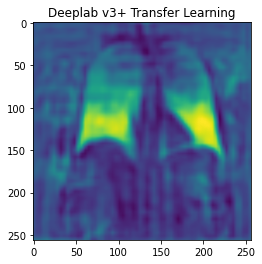

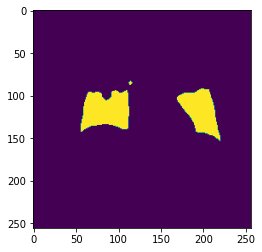

In [ ]:
########################### Covid PLOTS 
covid_img=test_covid.__getitem__(10)['image']
covid_mask=test_covid.__getitem__(10)['mask']

plt.figure()
plt.title("Image")
plt.imshow(covid_img[0,:,:])
plt.figure()
plt.title("True Mask")
plt.imshow(covid_mask[0,:,:])

tra=net_c(covid_img.reshape(1,3,256,256).to(device=device))
plt.figure()
plt.title("U-Net")
plt.imshow(tra[0,0,:,:].detach().cpu())
plt.figure()
tra=torch.where(tra>=0.5, 1, 0)
plt.imshow(tra[0,0,:,:].detach().cpu())

tra=net_tc(covid_img.reshape(1,3,256,256).to(device=device))
plt.figure()
plt.title("U-Net Transfer Learning")

plt.imshow(tra[0,0,:,:].detach().cpu())
plt.figure()
tra=torch.where(tra>=0.5, 1, 0)
plt.imshow(tra[0,0,:,:].detach().cpu())


tra=deep_c(covid_img.reshape(1,3,256,256).to(device=device))
plt.figure()
plt.title("Deeplab v3+")

plt.imshow(tra[0,0,:,:].detach().cpu())
plt.figure()
tra=torch.where(tra>=0.5, 1, 0)
plt.imshow(tra[0,0,:,:].detach().cpu())

tra=deep_tc(covid_img.reshape(1,3,256,256).to(device=device))
plt.figure()
plt.title("Deeplab v3+ Transfer Learning")

plt.imshow(tra[0,0,:,:].detach().cpu())
plt.figure()
tra=torch.where(tra>=0.5, 1, 0)
plt.imshow(tra[0,0,:,:].detach().cpu())